In [92]:
# 2023 OCT 25

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

# load data

In [94]:
titanic_df = pd.read_csv("../data/titanic_train.csv")

feature_names = ["PaxID", "Survived", "Class", "Name", "Sex", "Age", "SibSpo", "ParChi", "Ticket", "Fare", "Cabin", "PortEmba"]
titanic_df.columns = feature_names
display(titanic_df.head(3))

,PaxID,Survived,Class,Name,Sex,Age,SibSpo,ParChi,Ticket,Fare,Cabin,PortEmba
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**check**

In [95]:
# info
print(titanic_df.info())

# describe
# display(titanic_df.describe())
display(titanic_df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PaxID     891 non-null    int64  
 1   Survived  891 non-null    int64  
 2   Class     891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       714 non-null    float64
 6   SibSpo    891 non-null    int64  
 7   ParChi    891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Cabin     204 non-null    object 
 11  PortEmba  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,count,mean,std,min,25%,50%,75%,max
PaxID,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Class,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSpo,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
ParChi,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# pre-processing

**null**

In [96]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df["PortEmba"].fillna("N", inplace=True)

print(titanic_df.info())

# double check
print("\n", "number of nulls in dataset:", titanic_df.isnull().sum().sum(), sep="")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PaxID     891 non-null    int64  
 1   Survived  891 non-null    int64  
 2   Class     891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       891 non-null    float64
 6   SibSpo    891 non-null    int64  
 7   ParChi    891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Cabin     891 non-null    object 
 11  PortEmba  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

number of nulls in dataset:0


# analysis

**get "object" type columns**

In [97]:
object_type_feature_names = titanic_df.dtypes[titanic_df.dtypes == "object"].index.tolist()

print(object_type_feature_names )

['Name', 'Sex', 'Ticket', 'Cabin', 'PortEmba']


**distribution**

In [98]:
print(titanic_df["Sex"].value_counts(), "\n_____________________")
print(titanic_df["Cabin"].value_counts(), "\n_____________________")
print(titanic_df["PortEmba"].value_counts(), "\n_____________________")

male      577
female    314
Name: Sex, dtype: int64 
_____________________
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64 
_____________________
S    644
C    168
Q     77
N      2
Name: PortEmba, dtype: int64 
_____________________


**simplify "Cabin" names**

In [99]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
# print(titanic_df["Cabin"], "\n")

print(titanic_df["Cabin"].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


**groupby: Sex, Survived**

In [100]:
dfgb = titanic_df.groupby(["Sex", "Survived"])

print(dfgb["Survived"].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


*visualization*

<Axes: xlabel='Class', ylabel='Survived'>

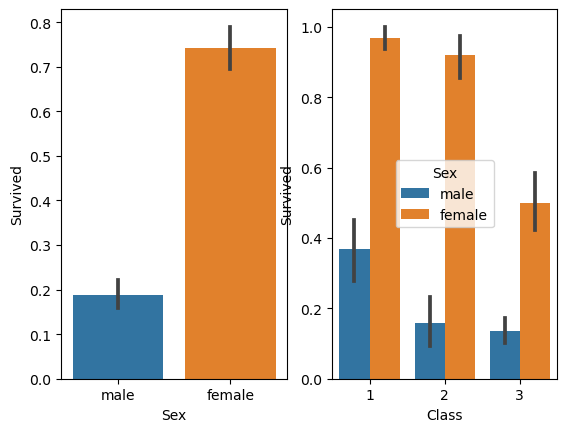

In [101]:
fig, ax = plt.subplots(1, 2)
sns.barplot(x="Sex", y="Survived", data=titanic_df, ax=ax[0])
sns.barplot(x="Class", y="Survived", hue="Sex", data=titanic_df, ax=ax[1])
# fig.show()

**age group**

In [102]:
# add "AgeGroup" feature
def assign_age_group(age):
    age_group = ""
    if age <= -1: age_group = "Unknown"
    elif age <= 5: age_group = "Baby"
    elif age <= 12: age_group = "Child"
    elif age <= 18: age_group = "Teenager"
    elif age <= 25: age_group = "Student"
    elif age <= 35: age_group = "Young Adult"
    elif age <= 60: age_group = "Adult"
    else: age_group = "Elderly"
        
    return age_group

age_group_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]

# add to df
titanic_df["AgeGroup"] = titanic_df["Age"].apply(lambda x: assign_age_group(x))

*visualization*

<Axes: xlabel='AgeGroup', ylabel='Survived'>

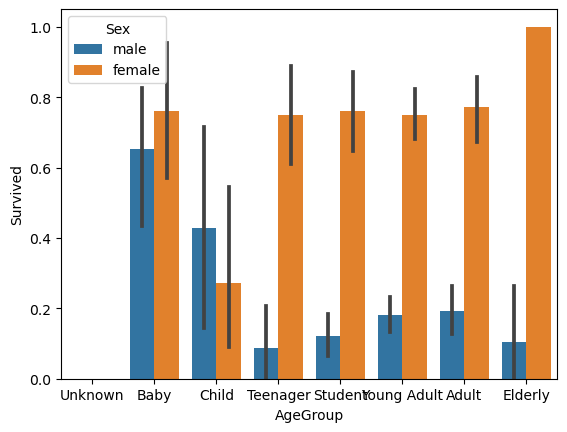

In [103]:
sns.barplot(x="AgeGroup", y="Survived", hue="Sex", data=titanic_df, order=age_group_names)

*drop "age group" since it will not be used later*

In [104]:
titanic_df.drop("AgeGroup", axis=1, inplace=True)
display(titanic_df.head(1))

,PaxID,Survived,Class,Name,Sex,Age,SibSpo,ParChi,Ticket,Fare,Cabin,PortEmba
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


**encoding**

In [105]:
from sklearn.preprocessing import LabelEncoder

features_to_encode = ["Cabin", "Sex", "PortEmba"]

def encode_features(df, features_to_encode):
    encoder = LabelEncoder()
    for feature in features_to_encode:
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        
        print(encoder.classes_)
    
    return df

titanic_df = encode_features(titanic_df, features_to_encode)
display(titanic_df.head(3))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


,PaxID,Survived,Class,Name,Sex,Age,SibSpo,ParChi,Ticket,Fare,Cabin,PortEmba
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
